In [20]:
#Building the neural network architecture 
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [21]:
#Loading the model again and checking 

state_dict = torch.load("MINST.pth")
model.load_state_dict(state_dict)
print(model.state_dict().keys())


odict_keys(['0.weight', '0.bias', '2.weight', '2.bias', '4.weight', '4.bias'])


In [24]:
def image_to_data(image):
    image_data = np.array(image) / 255
    image_data = image_data.reshape((1, 28, 28))
    image_data = torch.from_numpy(image_data)
    image_data = image_data.float()
    return image_data

import os
from PIL import Image
import numpy as np 


#print(os.listdir('../Dataset/MNIST/testSet'))
image = Image.open('../Dataset/MNIST/testSet/img_20.jpg')
data = image_to_data(image)
# data = torch.from_numpy(data)
# data = data.float()
# print(data.shape)
# print(images[10].shape)

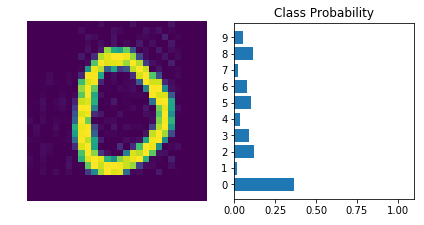

In [26]:
#predicting 
img = data.view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)


In [29]:
#Simplet way to save the model 
checkpoint = {'input_size':784,
              'output_size':10,
              'hidden_layers':[each.out_features for each in model.hidden_layers]
             }

AttributeError: 'Sequential' object has no attribute 'hidden_layers'